In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
# Data preparation
def generator(x,G_noise, train = True):
    if train == True:
        return 1.2*math.sin(math.pi * x) - math.cos(2.4 * math.pi * x) + 0.3*G_noise
    else:
        return 1.2*math.sin(math.pi * x) - math.cos(2.4 * math.pi * x) + 0*G_noise

train_x = np.arange(-1,1,0.05)
test_x = np.arange(-1,1, 0.01)
G_noise = np.random.normal(0, 1, len(train_x))
train_y = np.empty(len(train_x))
test_y = np.empty(len(test_x))

for i in range(len(train_x)):
    train_y[i] = generator(train_x[i], G_noise[i], True)
for i in range(len(test_x)):
    test_y[i] = generator(test_x[i], 0, False)

(a) Exact interpolation

In [20]:
# RBF is a Gaussian function. Then we need to calculate phi using exact interpolation to get interpolation matrix
phi = np.zeros((len(train_x), len(train_x)))
std = 0.01
for i in range(phi.shape[0]):
    for j in range(phi.shape[1]):
        r = train_x[i] - train_x[j]
        phi[i,j] = np.exp(-r**2/(2*std))


In [21]:
# solve the linear equation to get unique solution of w
w = np.linalg.inv(phi).dot(train_y)


In [22]:
# Feed test data
phi_test = np.zeros((len(test_x), len(train_x)))
for i in range(phi_test.shape[0]):
    for j in range(phi_test.shape[1]):
        r = test_x[i] - train_x[j]
        phi_test[i,j] = np.exp(-r**2/(2*std))

# Predict
predict_y = phi_test.dot(w)

# mean of sum of squares Error
train_error = sum((train_y - (phi.dot(w)))**2)/(len(train_x))
test_error = sum((test_y - predict_y)**2)/(len(test_x))
print("Train error of exact interpolation is %r" %train_error)
print("Test error of exact interpolation is %r" %test_error)

Train error of exact interpolation is 3.3428338306829254e-19
Test error of exact interpolation is 3.4468849747928116


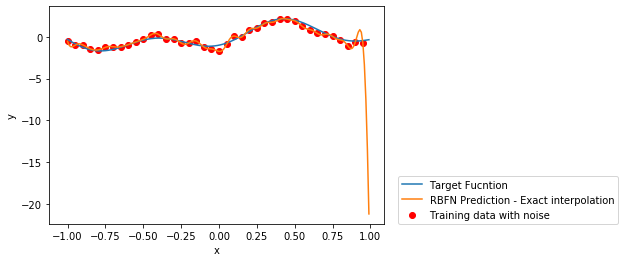

In [27]:
# Plot the approximation figure
plt.plot(test_x, test_y, label ="Target Fucntion" )
plt.plot(test_x, predict_y, label ="RBFN Prediction - Exact interpolation")
plt.scatter(train_x, train_y, label ="Training data with noise", color = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = (1.04,0))
plt.show()

(b) Fixed centers selected at 15 random centers

In [15]:
# Generate 15 random centers
rand_id = random.sample(range(0, len(train_x)), 15)
M = train_x[rand_id]

# since it is one dimensional space, the max distance is the max index difference
d_max = train_x[max(rand_id)] - train_x[min(rand_id)]

In [16]:
# Calculate the phi matrix
phi = np.zeros((len(train_x), len(M)))
for i in range(phi.shape[0]):
    for j in range(phi.shape[1]):
        r = train_x[i] - M[j]
        phi[i,j] = np.exp(-len(M)/(d_max**2) * (r**2))
# print(phi.shape)

In [17]:
# calculate w
w = np.linalg.pinv(phi).dot(train_y)

In [18]:
# Feed test data
phi_test = np.zeros((len(test_x), len(M)))
for i in range(phi_test.shape[0]):
    for j in range(phi_test.shape[1]):
        r = test_x[i] - M[j]
        phi_test[i,j] = np.exp(-len(M)/(d_max**2) * (r**2))

# Predict
predict_y = phi_test.dot(w)

# mean of sum of squares Error
train_error = sum((train_y - (phi.dot(w)))**2)/(len(train_x))
test_error = sum((test_y - predict_y)**2)/(len(test_x))
print("Train error of exact interpolation is %r" %train_error)
print("Test error of exact interpolation is %r" %test_error)

Train error of exact interpolation is 0.039939795765957624
Test error of exact interpolation is 0.05307132233033363


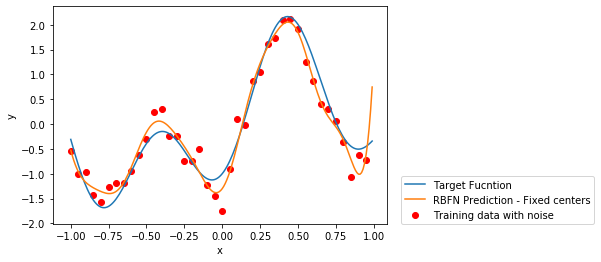

In [19]:
# Plot the approximation figure
plt.plot(test_x, test_y, label ="Target Fucntion" )
plt.plot(test_x, predict_y, label ="RBFN Prediction - Fixed centers")
plt.scatter(train_x, train_y, label ="Training data with noise", color = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = (1.04,0))
plt.show()

(b) Add regularization parameters for part (a)

In [67]:
lambda_factor = 500
phi = np.zeros((len(train_x), len(train_x)))
std = 0.01
for i in range(phi.shape[0]):
    for j in range(phi.shape[1]):
        r = train_x[i] - train_x[j]
        phi[i,j] = np.exp(-r**2/(2*std))

# solve the linear equation to get unique solution of w
tmp =  np.linalg.inv((np.transpose(phi).dot(phi) + lambda_factor*np.identity(phi.shape[0])))
tmp2 = np.transpose(phi).dot(train_y)
w = np.dot(tmp,tmp2)

# Feed test data
phi_test = np.zeros((len(test_x), len(train_x)))
for i in range(phi_test.shape[0]):
    for j in range(phi_test.shape[1]):
        r = test_x[i] - train_x[j]
        phi_test[i,j] = np.exp(-r**2/(2*std))

# Predict
predict_y = phi_test.dot(w)

# mean of sum of squares Error
train_error = sum((train_y - (phi.dot(w)))**2)/(len(train_x))
test_error = sum((test_y - predict_y)**2)/(len(test_x))
print("Train error of exact interpolation is %r" %train_error)
print("Test error of exact interpolation is %r" %test_error)            

Train error of exact interpolation is 1.0836933861251015
Test error of exact interpolation is 1.156494260489846


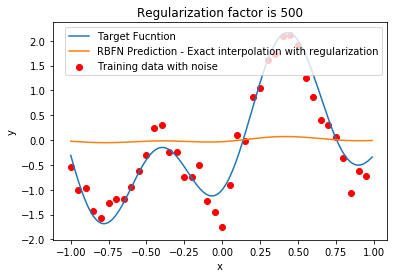

In [68]:
# Plot the approximation figure
plt.plot(test_x, test_y, label ="Target Fucntion" )
plt.plot(test_x, predict_y, label ="RBFN Prediction - Exact interpolation with regularization")
plt.scatter(train_x, train_y, label ="Training data with noise", color = "r")
plt.xlabel("x")
plt.ylabel("y")
# plt.legend(loc = (1.04,0))
plt.legend(loc = "best")
plt.title('Regularization factor is %s' %lambda_factor )
plt.savefig(str(lambda_factor)+'.png')
plt.show()